In [1]:
# Dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

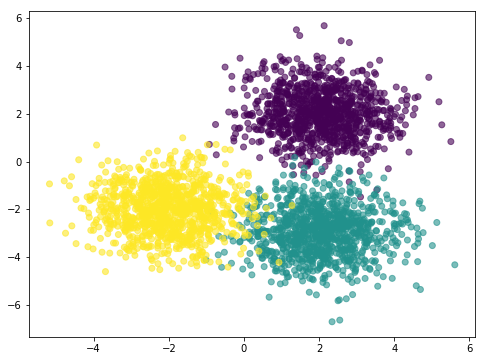

In [2]:
D = 2
K = 3
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([2,-3])
X2 = np.random.randn((N//K),D) + np.array([-2,-2])
X = np.vstack((X0, X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.6)

In [3]:
X = np.hstack((np.ones((X.shape[0],1)), X))

In [4]:
Y = pd.get_dummies(y)

In [5]:
#soft max
def sigmoid(h):
    return np.exp(h) / np.vstack((np.sum(np.exp(h), axis = 1)))

def cross_entropy(y, p):
    return  -np.sum(y*np.log(p))

def accuracy(y, p):
    return np.mean(y == np.round(p))

def accuracy1(y, y_hat):
    return np.sum(np.sum((y==1)&(y_hat ==1))) / y.shape[0]

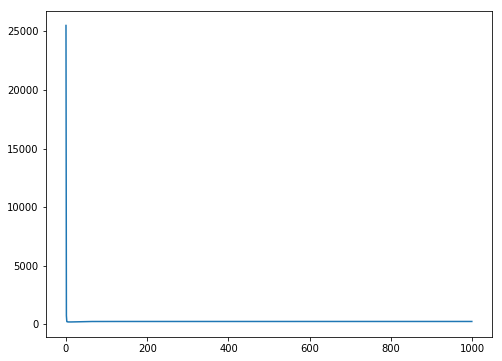

In [6]:
w = np.random.randn(D+1,K)

Y = np.array(Y)

J = []
eta = 1e-3
epochs = int(1e3)

l1 = 10
l2 = 20

for t in range(epochs):
    p = sigmoid(X.dot(w))
    J.append((cross_entropy(Y, p)) + (l2/2)* np.sum(w.dot(w)) + l1 *np.sum(np.abs(w)))
    w -= eta*(X.T.dot(p - Y) + l1*np.sign(w) + l2*w)
    
plt.figure(figsize = (8,6))
plt.plot(J)


In [7]:
y_hat = (p == p.max(axis=1)[:,None]).astype(int)

In [8]:
accuracy1(Y,y_hat)

0.9816666666666667

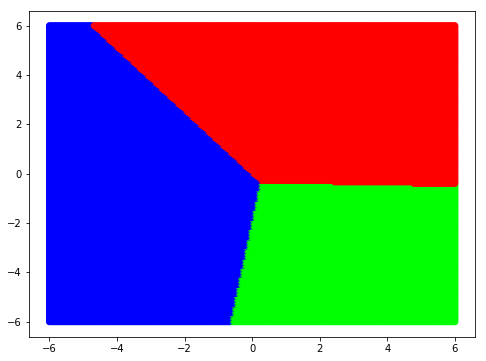

In [9]:
#X_vis = np.random.uniform(-6,6, (int(10*N),D))
X_vis = np.linspace(-6,6,200)
#X_vis = np.hstack((np.ones((int(10*N),1)), X_vis))
X_vis =np.vstack([[(1, i,j) for i in X_vis] for j in X_vis])

X_vis[:10,:]

p_vis = sigmoid(X_vis.dot(w))

y_hat = (p_vis == p_vis.max(axis=1)[:,None]).astype(int)

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,1], X_vis[:,2], c = y_hat)

In [10]:
p.argmax(axis=1)

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [11]:
y

array([0, 0, 0, ..., 2, 2, 2])

In [12]:
y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

In [13]:
y == p.argmax(axis=1)

array([ True,  True,  True, ...,  True,  True,  True])

In [28]:
w.shape

(3, 3)

In [27]:
K

3